## Image Classifier using Neural Networks (Keras and Tensorflow ) on fashion_mnist dataset

In [2]:
import numpy as np
import pandas.compat
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.6.0'

In [5]:
tf.__version__

'2.6.0'

In [6]:
#Training data set consists of 60,000 images 28X28 pixels along with set of 10,000 images as test data
from keras.datasets import fashion_mnist

In [7]:
fashion_mnist=keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


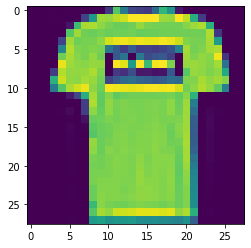

In [8]:
plt.imshow(X_train[1]) # 2nd Image

In [9]:
Y_train[1] # Labels for the data present 

0

#### Labels and Categories of Fashion_Mnist Dataset
   Y(Label)$~~~~~~~~~~$Categories

*    0  $~~~~~~~~~~$T-shirt/Top
*    1  $~~~~~~~~~~$Trouser
*    2  $~~~~~~~~~~$Pullover
*    3  $~~~~~~~~~~$Dress
*    4  $~~~~~~~~~~$Coat
*    5  $~~~~~~~~~~$Sandal
*    6  $~~~~~~~~~~$Shirt
*    7  $~~~~~~~~~~$Sneaker
*    8  $~~~~~~~~~~$Bag
*    9  $~~~~~~~~~~$AnkleBoot

In [10]:
Class_name=["T-shirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

In [11]:
Class_name[Y_train[1]]

'T-shirt/Top'

In [12]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

## Data Normalisation
We normalise the data so that data dimensions are approximately of same scale ie bw 0 and 1

In [13]:
x_train_new=X_train/255.
x_test_new=X_test/255.

In [14]:
x_train_new[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

### Split the dataset into training/valiadation and testing data set 
* Training data set - used to train the model
* Valiadation data set - used for tuning hyperparameters and evaluate the models 
* Testing data set - for testing the model after intial verifications by valiadation set 

In [15]:
# 5000 images for validation and other for training data set 
x_valid,x_train=x_train_new[:5000],x_train_new[5000:]
y_valid,y_train=Y_train[:5000],Y_train[5000:]
x_test=x_test_new

In [16]:
len(x_train)

55000

* x_train,y_train - for training the model
* x_valid,y_valid - for tuning the hyperparameters 
* X_test,Y_test - for evaluating model performance

### Create Model architecture 
* Sequential -- Simple Neural Networks 
* Functional -- Complex Neural Networks

In [17]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))# Hidden Layer Trainable Paramaters=28*28*300+300
model.add(keras.layers.Dense(100,activation="relu"))# Hidden Layer  Trainable Paramaters=300*100+100
model.add(keras.layers.Dense(10,activation="softmax"))# Multi-class Classification Trainable Paramaters=100*10+10

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
! pip install pydot
import pydot

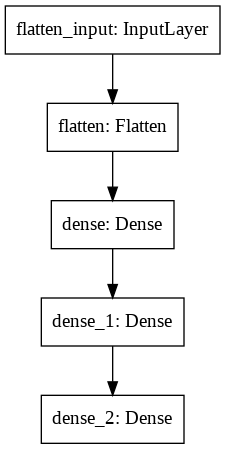

In [20]:
keras.utils.plot_model(model) # Structure of the Model (Neural Network)

* We can access parameters using get_weights method

In [21]:
weights,biases=model.layers[1].get_weights()
weights

array([[-0.01406704, -0.02154808, -0.02123448, ...,  0.07084502,
         0.04424275, -0.03713759],
       [-0.07362926, -0.05622609, -0.07146684, ...,  0.06312485,
        -0.06988291,  0.06178287],
       [-0.06744258,  0.03827664,  0.02418782, ...,  0.07316773,
        -0.01914394,  0.02172401],
       ...,
       [ 0.01748142,  0.01242112, -0.00955036, ...,  0.04121427,
        -0.05971663, -0.01546476],
       [ 0.06112257,  0.02638187,  0.05291136, ...,  0.03561859,
        -0.06567747, -0.06319621],
       [-0.07303446, -0.05533104,  0.04603252, ..., -0.03015528,
         0.02151089, -0.01678088]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

### Compiling and training of Neural Network
https://keras.io/api/models/

In [24]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
# loss func for multi-class classification--- sparse_categorical_crossentropy ie when we have labels in y variable
# if we have probabilities in y variable--- categorical_crossentropy
# For binary labels we use binary crossentropy

In [25]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7076 - accuracy: 0.7697 - val_loss: 0.5027 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4837 - accuracy: 0.8328 - val_loss: 0.4446 - val_accuracy: 0.8506
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4394 - accuracy: 0.8468 - val_loss: 0.4288 - val_accuracy: 0.8490
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4125 - accuracy: 0.8556 - val_loss: 0.4026 - val_accuracy: 0.8666
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3937 - accuracy: 0.8611 - val_loss: 0.3778 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3772 - accuracy: 0.8668 - val_loss: 0.3796 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3643 - accuracy: 0.8711 - val_loss: 0.3711 - val_accuracy:

In [26]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [27]:
model_history.history

{'accuracy': [0.7696545720100403,
  0.8327999711036682,
  0.8468363881111145,
  0.8555636405944824,
  0.8610727190971375,
  0.8667636513710022,
  0.8711090683937073,
  0.875036358833313,
  0.8788363933563232,
  0.8820000290870667,
  0.8844727277755737,
  0.8865272998809814,
  0.8897454738616943,
  0.8909090757369995,
  0.8941272497177124,
  0.8962545394897461,
  0.8981454372406006,
  0.8999999761581421,
  0.9010727405548096,
  0.9030545353889465,
  0.9056727290153503,
  0.9062545299530029,
  0.9085817933082581,
  0.909709095954895,
  0.9121817946434021,
  0.9129090905189514,
  0.9141636490821838,
  0.9160727262496948,
  0.9175454378128052,
  0.9187090992927551],
 'loss': [0.7076296806335449,
  0.4836792051792145,
  0.4393666982650757,
  0.4125175178050995,
  0.39369624853134155,
  0.37723878026008606,
  0.3642767071723938,
  0.3518805503845215,
  0.3412018120288849,
  0.33209383487701416,
  0.3238168954849243,
  0.31659725308418274,
  0.3083488643169403,
  0.30171269178390503,
  0.2954

<function matplotlib.pyplot.show>

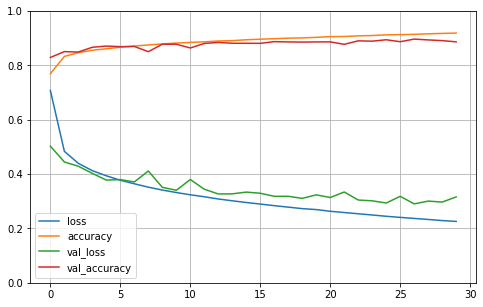

In [28]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

#### Evaluating Performance and prediction of the Model


In [29]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 56.6532 - accuracy: 0.8590


[56.653236389160156, 0.859000027179718]

In [31]:
x_new=X_test[:3]  # Taking first three datasets for evaluation and prediction


In [32]:
# Calculating the probability of each class(10 classes)
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
# Predicting which class does sample belongs to 
y_pred=np.argmax(y_proba,axis=1)
y_pred

array([9, 2, 1])

In [43]:
# Class names with already defined list "Class_name" for accessing names using indexes
np.array(Class_name)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


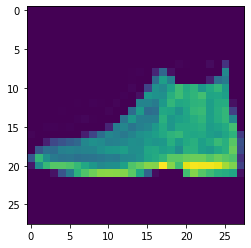

In [44]:
# Checking whether results are accurate or not
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


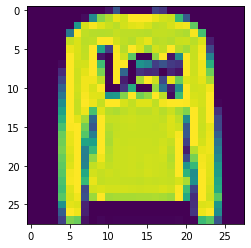

In [45]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


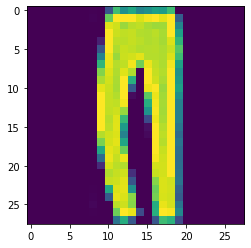

In [46]:
print(plt.imshow(X_test[2]))